<a href="https://colab.research.google.com/github/MartinezJohan94/Matematicas_para_el_aprendizaje_de_maquinas/blob/main/SVMBasic_JSMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1 (Johan Sebástian Martínez Benítez)

For this assignment you will use the following SVM implementation for classifying these datasets:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication

https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.


# Construir historia relacionada con la identificación de billetes

# DATA SET 1 (Billetes)

**DATA SET 1:**
Tomada de la web "Machine Learning Repository". 
https://archive.ics.uci.edu/ml/datasets/banknote+authentication

1.   El ejercicio de aprendizaje automático con esta data consiste en indicar si el billete de la imagen es genuino o falso a partir de las características allí registradas. 

In [ ]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
import random

from google.colab import drive
drive.mount('/content/drive')
billetes = pd.read_csv('/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Taller 1/data_billetes.txt', sep=',')
billetes.loc[billetes['Clase'] <1, 'Clase'] = -1                                #Renombramos la etiqueta 0 con -1
#billetes.info()
num_registros, num_variables=billetes.shape


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Esta data corresponde a datos extraídos de imágenes que fueron tomadas para la evaluación de un procedimiento de autenticación para billetes. Los datos se extrajeron de imágenes tomadas de muestras genuinas y falsificadas similares a billetes. Para la digitalización, se utiilzó una cámara industrial generalmente utilizada para la inspección de la impresión. Las imágenes finales tienen entre 400 x 400 pixeles. Debido a la lente del objeto investigado, se obtuvieron imágenes en escala de grises con una resolución de aproximadamente 600dpi. Se utilizó la Transformada Wavelet para extraer entidades de las imágenes. Para comprender un poco mejor esto, considérese una "wavelet" como una oscilación con una amplitud que inicia en cero, aumenta o disminuye y vuelve a cero una o más veces. Son utilizadas para extraer información de diferentes tipos de datos como señales de audio o imágenes que es el caso de este ejercicio. Así, la transformada es utilizada para la compresión de imágenes (usando la compresión wavelet) de manera que se almacenen los datos de imagen en la menor cantidad de espacio posible. 



In [ ]:
#Análisis descriptivo de la data
print(f"El dataset 'billetes' cuenta con {num_registros} registros y {num_variables} variables.")
print(f"El dataset 'billetes' cuenta con las variables {billetes.columns.tolist()}")
#billetes.isna().sum()

# Estadísticas descriptivas para todas las columnas
#print(billetes.describe())
#print(f"la moda de la varianza es  {billetes['Varianza_WT'].mode()}.")

El dataset 'billetes' cuenta con 1372 registros y 5 variables.
El dataset 'billetes' cuenta con las variables ['Varianza_WT', 'Asimetria_WT', 'Curtosis_WT', 'Entropia_WT', 'Clase']


  El dataset cuenta con 1372 registros, cada uno con 5 variables o características. De estas, 4 corresponden a datos cuantitativos y la otra restante corresponde a una variable cualitativa o factor. Las variables son:

*   **"Clase"**: Es la etiqueta que indica si los datos representan un billete falso o no; dentro de la data corresponde a una variable de tipo cualitativo representada por los valores 1 y -1 (billete genuino y falso respectivamente). 

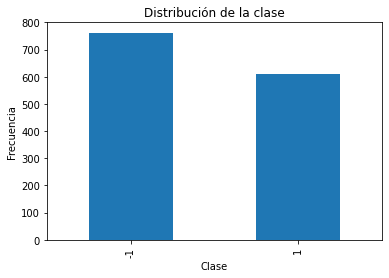

In [ ]:
#Gráfico de barras para la columna "Clase"
billetes['Clase'].value_counts().plot(kind='bar')
plt.title('Distribución de la clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()


#sns.histplot(billetes, x='Entropia_WT', hue='Clase', kde=True)
#plt.title('Distribución de la Entropía por Clase')
#plt.show()

#varianza_wt = billetes['Varianza_WT'].sort_values()
#x = np.sort(varianza_wt)
#y = np.arange(1, len(x)+1) / len(x)
#plt.plot(x, y, marker='.', linestyle='none')
#plt.xlabel('Varianza_WT')
#plt.ylabel('Distribución empírica')
#plt.title('Curva de distribución empírica de Varianza_WT')
#plt.show()


A partir de esta variable es posible afirmar que existe una mayor cantidad de imágenes correspondientes a billetes falsos que a billetes genuinos.

*   **"Varianza_WT"**: Corresponde a la varianza de la imagen luego de aplicarse la transformada de Wavelet (continua). Mide qué tanto varía el registro frente a la distribución de los datos luego de trasnformarlos. 

  A continuación se tienen algunas métricas descriptivas para esta variable así como un histograma que indique su distribución:



In [ ]:
billetes['Varianza_WT'].describe()
np.var(billetes['Varianza_WT'])

8.075408962235304

|           |Varianza_WT|
|-----------|-----------|
|N. Datos   |       1372|
|Min        |  -7.042100|
|Media      |   0.433735|
|Mediana    |   0.496180|
|Max        |   6.824800|
|D. estandar|   2.842763|
|Varianza   |   8.075409| 

array([[<Axes: title={'center': 'Varianza_WT'}>]], dtype=object)

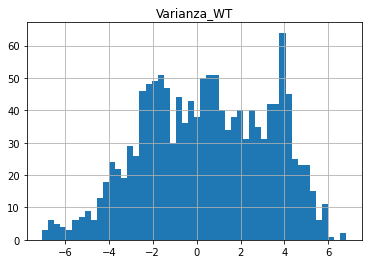

In [ ]:
#Histograma para "Varianza_WT"
billetes.hist(column=['Varianza_WT'], bins=50)

Se puede notar que, dentro de esta variable, no existen registros NaN, así mismo, se tiene que existe una gran cantidad de datos con valores cercanos a 4 y que los datos tienden un poco hacia la derecha. 

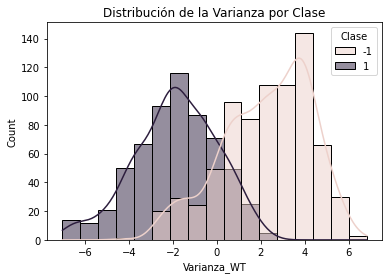

In [ ]:
#Histograma para "Varianza_WT"
sns.histplot(billetes, x='Varianza_WT', hue='Clase', kde=True)
plt.title('Distribución de la Varianza por Clase')
plt.show()

  Revisando los datos por cada clase se nota que existe una diferencia importante respecto al comportamiento de la varianza entre los registros de billetes auténticos comparado con los registros de billetes falsos; esta diferencia muestra que, la varianza luego de la transformada Wavelet para los billetes genuinos tiende a tener valores inferiores que aquellos registros correspondientes a billetes falsos.

*   **"Asimetria_WT"**: Corresponde a la asimetría de la imagen luego de aplicarse la transformada de Wavelet (continua). Mide qué tan asimétrico es el registro frente a la distribución de los datos luego de transformarlos. Dentro de la data corresponde a una variable de tipo float.

  A continuación se tienen algunas métricas descriptivas para esta variable así como un histograma que indique su distribución:



In [ ]:
billetes['Asimetria_WT'].describe()
np.var(billetes['Asimetria_WT'])

34.42060347729251

|           |Asimetria_WT|
|-----------|------------|
|N. Datos   |        1372|
|Min        |  -13.773100|
|Media      |    1.922353|
|Mediana    |    2.319650|
|Max        |   12.951600|
|D. estandar|    5.869047|
|Varianza   |   34.420603| 

array([[<Axes: title={'center': 'Asimetria_WT'}>]], dtype=object)

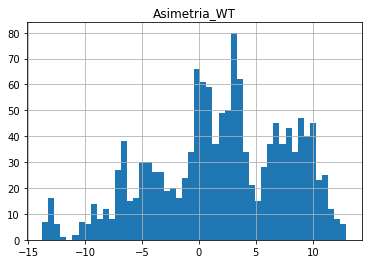

In [ ]:
#Histograma para "Asimetria_WT"
billetes.hist(column=['Asimetria_WT'], bins=50)

 Se puede notar que, dentro de esta variable, no existen registros NaN, así mismo, se tiene aunque el valor mínimo es -13.773100, los datos se acumulan principalmente desde -10 aproximadamente. Dentro de este rango de valores, es posible observar diferentes picos, principalmente hacia los datos 0.5706 y 0.

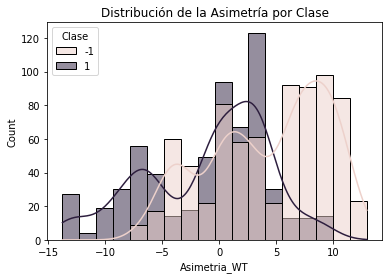

In [ ]:
#Histograma de "Asimetría_WT" por "Clase"
sns.histplot(billetes, x='Asimetria_WT', hue='Clase', kde=True)
plt.title('Distribución de la Asimetría por Clase')
plt.show()

  Realizando el análisis por cada una de las clases se tiene que, existe una diferencia importante en los registros de la asimetría luego de realizar la transofmada Wavelet a las imágenes y que genera que los datos para los billetes falsos se ubiquen en una buena proporción después de 5 y que sean mayores respecto a los billetes genuinos los cuales tienen una cola notable hacia valores inferiores a -5.

*   **"Curtosis_WT"**: Indica la curtosis de la imagen luego de aplicarse la transformada de wavelet (continua). Mide el grado de concentración del dato respecto a la distribución luegode la transformada. Dentro de la data corresponde a una variable de tipo float.

  A continuación se tienen algunas métricas descriptivas para esta variable así como un histograma que indique su distribución:



In [ ]:
billetes['Curtosis_WT'].describe()
np.var(billetes['Curtosis_WT'])

18.562819757086643

|           |Curtosis_WT|
|-----------|-----------|
|N. Datos   |       1372|
|Min        |  -5.286100|
|Media      |   1.397627|
|Mediana    |   0.616630|
|Max        |  17.927400|
|D. estandar|   4.310030|
|Varianza   |   18.56282|

array([[<Axes: title={'center': 'Curtosis_WT'}>]], dtype=object)

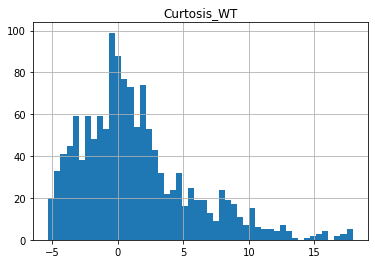

In [ ]:
#Histograma para "Curtosis_WT"
billetes.hist(column=['Curtosis_WT'], bins=50)

  Se puede notar que, dentro de esta variable, no existen registros NaN, así mismo, se tiene los datos están fuertemente sesgados hacia la izquierda tomando valores principalmente entre -5 y 5. Sin embargo, se genera una cola a la derecha que se extiende hasta 17.9274.


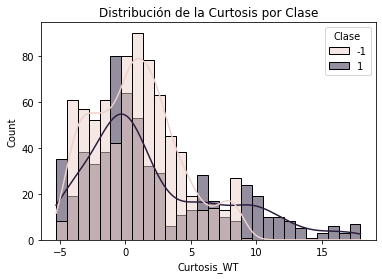

In [ ]:
#Histograma de "Curtosis_WT" por "Clase"
sns.histplot(billetes, x='Curtosis_WT', hue='Clase', kde=True)
plt.title('Distribución de la Curtosis por Clase')
plt.show()

Realizando el análisis por cada una de las clases se observa que la cola derecha está generada principalmente por resultados provenientes de billetes auténticos. 

*   **"Entropia_WT"**: Correponde a la entropía de la imagen (continua). Mide la incertidumbre de la fuente de información; dentro de la data corresponde a una variable de tipo float.

  A continuación se tienen algunas métricas descriptivas para esta variable así como un histograma que indique su distribución:



In [ ]:
billetes['Entropia_WT'].describe()
np.var(billetes['Entropia_WT'])

4.411038815454349

|           |Entropia_WT|
|-----------|-----------|
|N. Datos   |       1372|
|Min        |  -8.548200|
|Media      |  -1.191657|
|Mediana    |  -0.586650|
|Max        |   2.449500|
|D. estandar|   2.101013|
|Varianza   |   4.411039|


array([[<Axes: title={'center': 'Entropia_WT'}>]], dtype=object)

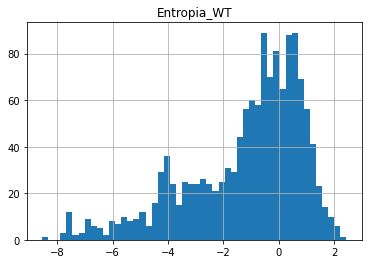

In [ ]:
#Histograma para "Entropia_WT"
billetes.hist(column=['Entropia_WT'], bins=50)

  Se puede notar que, dentro de esta variable, no existen registros NaN, así mismo, se tiene que los registros se encuentran sesgados a la derecha tomando valores entre -2 y 2 principalmente. Así mismo, se observa una cola a la izquierda que se extiende hasta el registro mínimo de -8.5482.

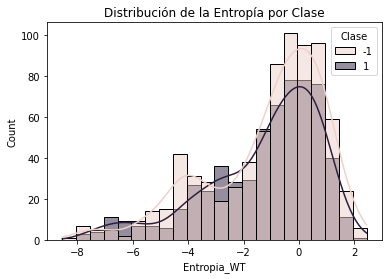

In [ ]:
#Histograma de Entropia_WT por Clases
sns.histplot(billetes, x='Entropia_WT', hue='Clase', kde=True)
plt.title('Distribución de la Entropía por Clase')
plt.show()

# Gráfico de dispersión para las columnas "Varianza_WT" y "Entropia_WT"
#plt.scatter(billetes['Varianza_WT'], billetes['Entropia_WT'])
#plt.title('Dispersión de Varianza_WT vs Entropia_WT')
#plt.xlabel('Varianza_WT')
#plt.ylabel('Entropia_WT')
#plt.show()



Realizando el análisis por cada una de las clases se observa que, hay unos ligeros cambios en la masa para valores principalmente entre -2 y 2 así como en -4. Estos debidos posiblemente a la cantidad de registros que hay por cada clase.

A continuación se deja una tabla que resume algunas estadísticas de las variables cuantitativas agrupadas por cada clase. 






  





In [ ]:
# Estadísticas descriptivas por clase
from scipy.stats import kurtosis
#print(billetes.groupby('Clase')['Varianza_WT'].describe())
billetes.groupby('Clase')['Varianza_WT'].apply(np.var)
billetes.groupby('Clase')['Varianza_WT'].apply(skew)
billetes.groupby('Clase')['Varianza_WT'].apply(kurtosis)
#print(billetes.groupby('Clase')['Asimetria_WT'].describe())
billetes.groupby('Clase')['Asimetria_WT'].apply(np.var)
billetes.groupby('Clase')['Asimetria_WT'].apply(skew)
billetes.groupby('Clase')['Asimetria_WT'].apply(kurtosis)
#print(billetes.groupby('Clase')['Curtosis_WT'].describe())
billetes.groupby('Clase')['Curtosis_WT'].apply(np.var)
billetes.groupby('Clase')['Curtosis_WT'].apply(skew)
billetes.groupby('Clase')['Curtosis_WT'].apply(kurtosis)
#print(billetes.groupby('Clase')['Entropia_WT'].describe())
billetes.groupby('Clase')['Entropia_WT'].apply(np.var)
billetes.groupby('Clase')['Entropia_WT'].apply(skew)



billetes.groupby('Clase')['Entropia_WT'].apply(kurtosis)


Clase
-1    0.413815
 1    0.596764
Name: Entropia_WT, dtype: float64

|   |    | # Datos | Min      | Media     | Mediana  | Max     | D. Estandar | Varianza  | Skewness  | Curtosis  |
|---|----|---------|----------|-----------|----------|---------|-------------|-----------|-----------|-----------|
|   | -1 | 762     | -4.2859  | 2.276686  | 2.5531   | 6.8248  | 2.019348    | 4.072416  | -0.491571 | -0.361150 |
|   | 1  | 610     | -7.0421  | -1.868443 | -1.8061  | 2.3917  | 1.881183    | 3.533047  | -0.300938 | -0.183951 |
|   | -1 | 762     | -6.9321  | 4.256627  | 5.668800 | 12.9516 | 5.138792    | 26.372529 | -0.379434 | -1.040622 |
|   | 1  | 610     | -13.7731 | -0.993576 | 0.172775 | 9.6014  | 5.404884    | 29.164879 | -0.516072 | -0.535194 |
|   | -1 | 762     | -4.9417  | 0.796718  | 0.700605 | 8.8294  | 3.239894    | 10.483136 | 0.428928  | -0.335026 |
|   | 1  | 610     | -5.2861  | 2.148271  | 0.373720 | 17.9274 | 5.261811    | 27.641266 | 0.953895  | 0.196252  |
|   | -1 | 762     | -8.5482  | -1.147640 | -0.55238 | 2.4495  | 2.125077    | 4.510025  | -0.998025 | 0.413815  |
|   | 1  | 610     | -7.5887  | -1.246641 | -0.66165 | 2.1353  | 2.070984    | 4.281943  | -1.057938 | 0.596764  |

3. asfaf


*   a)

*   b)

*   c)


4. agafg
5. adfgafg
6. agafafhad

In [ ]:
#Ya que contamos solo con un conjunto de datos, vamos a dividirlo en 3 muestras aleatorias del mismo para realizar el entrenamiento, testeo y validación.
#plt.hist(billetes['Clase'])
#plt.boxplot(billetes['Entropia_WT'])
billetes_train=billetes.sample(frac=.7)
#billetes_train
random. seed(0) 
len(billetes.sample(frac=.7))

len(billetes)
billetes_train['Train']=1               #Asignamos etiqueta para aquellos registros seleccionados como data de entrenamiento. 
billetes_train
billetes_train.isna().sum()

#Se deben separar los datos por etiqueta para usarlos en el modelo creando los diccionarios. #Esto debe hacerse luego de separar la data en 3.
#Clase1 = billetes['Clase']
#Clase1

In [ ]:
billetes1=pd.merge(billetes, billetes_train, how="outer")  #Cruzamos la data Train con la original para identificar quiénes de esta data se usarán en el Training.
len(billetes1)
#billetes1['Train'] = billetes1['Train'].fillna(0)   #Se reemplazan los valores NAN con 0.
#billetes1
#billetes2 = billetes1.loc[billetes1['Train'] == 0]  #Extraemos de la data original aquella que registra como no tomada o usada para el Train.
#billetes2 = billetes2.drop('Train', axis=1) #Eliminamos la columna "Train"
#billetes2

In [ ]:
len(billetes2.sample(frac=.6))
len(billetes2)
len(billetes)
1427-1372
#len(billetes_train)

In [ ]:
Clase2 = billetes['Clase']
Clase2

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Clase, Length: 1372, dtype: int64

Se cambia la etiqueta de 0 por -1

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Cargar el conjunto de datos iris de Scikit-Learn
iris = datasets.load_iris()
iris
# Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

El código que se tiene para aplicar el modelo SVM es el siguiente:

Optimized a step.
Optimized a step.
Optimized a step.


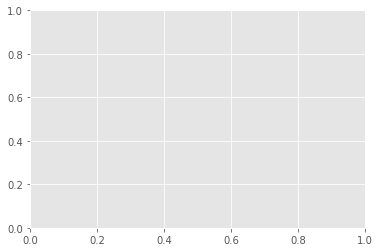

In [ ]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt                                                 #Librería para realizar gráficas interactivas (gráficos en 2D, 3D, histogramas, barplot, dispersión,...).
from matplotlib import style                                                    #"Librería" que se usa de matplotlib para modificar la apariencia de las gráficas
import numpy as np                                                              #Librería que da soporte para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas.
import pandas as pd                                                             #Librería especializada en la manipulación y análisis de datos.
style.use('ggplot')                                                             #Indica el "estilo" a utilizar para las gráficas

# Recordar que en la POO hay tres cosas repecto a los objetos, su estado(está definido por sus atributos -> datos que describen el estado actual del objeto), su comportamiento (estados-> permiten al objeto "hacer" algo) y su identidad (propiedad que permite diferenciarlo de otros objetos incluso de su misma clase).
#La palabra self simplemente nos permite usar variables y otros métodos dentro de la clase
#-> ¿Qué es un método? Basicamente es una función pero dentro de una clase y funciona dentro de la clase; son las acciones que puede realizar nuestro objeto, sus comportamientos.
#-> ¿Qué es una clase? Es el modelo donde se redactan las características comunes de un grupo de objetos. (El molde)

#Se define la clase SVM la cual tendrá las características comunes de este algoritmo.
class Support_Vector_Machine:                                                   #Se crea la clase (sección) SVM. Esta técnica de aprendizaje procura encontrar el mejor hiperplano para separar las etiquetas.
                                                                                #La clase contiene los métodos para ajustar el modelo a los datos y predecir el resultado de la clasificación.
    
    #Se crea el método __init__ el cual cuenta con los atributos (parámetros) de visualización y color, siempre va en una clase debido a que este inicializa los parámeros.
    #"self" representa la instancia de la clase 
    #En el caso del parámetro booleano "visualization" indica si se mostrarán visualmente los resultados de la clasificación de datos.
    def __init__(self, visualization=True):                                     #El método(función dentro de una clase) __init__ establece un estado inicial de la clase, es decir, inicializar los atributos. "visualization" se usa para determinar si se mostrarán visualmente los resultados de la clasificación de datos. 
        self.visualization = visualization                                      #El comando "self.visualization" crea el atributo visualization y lo inicia con el valor de la variable "visualization"
        #El comando "self" permite ingresar a los atributos y métodos de la clase, en este caso indica parámetros de visualización
        self.colors = {1:'r',-1:'b'}                                            #Indica parámetros de colores para las clases 1 y -1.
        if self.visualization:                                                  #Si está habilitado el permitir la visualización se generan los parámetros para la gráfica
            self.fig = plt.figure()                                             #Crea una nueva figura
            self.ax = self.fig.add_subplot(1,1,1)                               #Agrega una "subfigura" a la figura anterior, para ello indica su ubicación por medio de filas, columnas y el índice de la subfigura.
    
    # train                                                                     #Entrenamiento
    def fit(self, data):                                                        #El comando fit ajusta el modelo a los datos de entrenamiento
        self.data = data                                                        #Indica los datos para el conjunto de entrenamiento. #El parámetro 'data' es un diccionario que contiene arrays numpy para cada clase.
        # { ||w||: [w,b] }                                                      #Calcula la norma de w
        opt_dict = {}                                                           #Crea un diccionario vacío que luego se usará para almacenar los valores de 'w' y 'b' que serían óptimos para el modelo.

#Se construye una lista con "vectores" que indican las posibles transformaciones que podrían ser aplicadas a los vectores de soporte y que ayudan a verificar cómo el hiperplano estaría separando los datos.
# Originalmente el código incluye las siguientes transformaciones basadas en un caso de data con los vectores de características x en R^2
        transforms = [[1,1],                                                    #
                      [-1,1],                                                   #
                      [-1,-1],                                                  #
                      [1,-1]]                                                   #

#Sin embargo, se cambia el código inicial por las siguientes transformaciones teniendo encuenta que x está en R^4
        transforms= [[1,1,1,1],[1,1,1,-1],[1,1,-1,1],[1,1,-1,-1],               #
                     [1,-1,1,1],[1,-1,1,-1],[1,-1,-1,1],[1,-1,-1,-1],           #
                     [-1,1,1,1],[-1,1,1,-1],[-1,1,-1,1],[-1,1,-1,-1],           #
                     [-1,-1,1,1],[-1,-1,1,-1],[-1,-1,-1,1],[-1,-1,-1,-1]]       #



        all_data = []                                                           # Se construye una lista vacía que luego se usaría para almacenar la data con todas las instancias de todas las clases. Esto para poder ordenar y hallar máximos y mínimos en la normalización.
        for yi in self.data:                                                    #Recorre las etiquetas
            for featureset in self.data[yi]:                                    #Recorre los vectores de características
                for feature in featureset:                                 #REVISAR PORQUE NO SE COMPRENDE QUÉ ESTÁ RECORRIENDO (recorre y pega las características una bajo otra)
                    all_data.append(feature)                                    #Agrega elementos a la "data" feature

        self.max_feature_value = max(all_data)                                  #
        self.min_feature_value = min(all_data)                                  #
        all_data = None                                                         #

        # support vectors yi(xi.w+b) = 1                                        #
        

        step_sizes = [self.max_feature_value * 0.1,                             #Indica la cantidad de pasos para la estimación de los parámetros (Mira si converge)
                      self.max_feature_value * 0.01,                            #
                      # point of expense:
                      self.max_feature_value * 0.001,]                          #

        
        
        # extremely expensive
        b_range_multiple = 5                                                    #
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5                                                          #
        latest_optimum = self.max_feature_value*10                              #

        for step in step_sizes:                                                 #
            w = np.array([latest_optimum,latest_optimum])                       #
            # we can do this because convex                                     #
            optimized = False                                                   #
            while not optimized:                                                #
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),#
                                   self.max_feature_value*b_range_multiple,     #
                                   step*b_multiple):                            #
                    for transformation in transforms:                           #
                        w_t = w*transformation                                  #
                        found_option = True                                     #
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:                                     #
                            for xi in self.data[i]:                             #
                                yi=i                                            #
                                # Verifiy constraints
                                if not yi*(np.dot(w_t,xi)+b) >= 1:              #
                                    found_option = False                        #
                                    
                        if found_option:                                        #
                            # Computes norm                                     #
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]             #

                if w[0] < 0:                                                    #
                    optimized = True                                            #
                    print('Optimized a step.')                                  #
                else:                                                           #
                    w = w - step                                                #

            norms = sorted([n for n in opt_dict])                               #
            #||w|| : [w,b]                                                      #
            opt_choice = opt_dict[norms[0]]                                     #
            self.w = opt_choice[0]                                              # 
            self.b = opt_choice[1]                                              #
            latest_optimum = opt_choice[0][0]+step*2                            #
            

    def predict(self,features):                                                 #
        # sign( x.w+b )                                                         #
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)      #
        return classification                                                   #
        
        
data_dict = {-1:np.array([[1,7],                                                #
                          [2,8],                                                #   
                          [3,8],]),                                             #
             
             1:np.array([[5,1],                                                 #
                         [6,-1],                                                #
                         [7,3],])}                                              #
 
svm1 = Support_Vector_Machine()                                                 #
svm1.fit(data_dict)                                                             #


In [ ]:
svm1.predict([7,3.5])

1.0

# DATA SET 2 (Ocupación de habitación)

**DATA SET 2:**
Tomada de la web "Machine Learning Repository". 


1.   El ejercicio de aprendizaje automático para este dataset consiste en indicar si una habitación se encuentra ocupada o no a partir de características que arroja el ambiente dentro de la misma. 
2.   Esta data corresponde a datos experimentales utilizados para la clasificación binaria (ocupación de la habitación) a partir de la temperatura, humedad, luz y CO2. La "ocupación real" del suelo se obtuvoa partir de imágenes con etiquetado de tiempo que se tomaron cada minuto. Para este ejerciciose contemplaron 3 conjuntos de datos, para entrenamiento y prueba. Esta data cuenta con20560 registros y 7 variables que son:


*   Fecha del registro (año-mes-dia y hora:minuto:segundo).
*   Temperatura en grados Celsius de la habitación.
*   Porcentaje de humedad relativa de la habitación.
*   Luz de la habitación (medido en lux).
*   CO2 de la habitación medido en ppm.
*   Relación de humedad de la habitación, es una cantidad derivada de la temperatura y la humedad relativa medida enkgagua-vapor/kg-aire.
*   Indicador de ocupación (Etiqueta): Se usa 1 para indicar que la habitación estaba ocupada y 0 para indicar que no estaba ocupada.

3. asfaf


*   a)

*   b)

*   c)


4. agafg
5. adfgafg
6. agafafhad

In [ ]:
ocupacion_training = pd.read_csv('/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Taller 1/data_ocupacion/datatraining_room.txt', sep=',')
ocupacion_training

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [ ]:
ocupacion_test1 = pd.read_csv('/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Taller 1/data_ocupacion/datatest_room.txt', sep=',')
ocupacion_test1


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [ ]:
ocupacion_test2 = pd.read_csv('/content/drive/MyDrive/MAyF/Aprendizaje de Máquinas/2023/Talleres y tareas/Taller 1/data_ocupacion/datatest2_room.txt', sep=',')
ocupacion_test2

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...
9748,2015-02-18 09:15:00,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9749,2015-02-18 09:16:00,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9750,2015-02-18 09:16:59,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9751,2015-02-18 09:17:59,20.8900,28.022500,418.750000,1632.000000,0.004279,1
